# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h4>Exercises</h4>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****


In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

## 1. Is the distribution of body temperatures normal?

In [2]:
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.pyplot as plt

%matplotlib inline

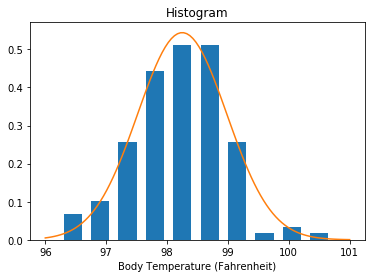

In [3]:
# Draw a histogram of body temperature and a normal distribution
plt.hist(df.temperature, width=0.3, normed=True)
plt.xlabel('Body Temperature (Fahrenheit)')
plt.title('Histogram')
xs = np.linspace(96, 101, 100)
temp_mean = df.temperature.mean()
temp_std = df.temperature.std()
pdf = stats.norm.pdf(xs, temp_mean, temp_std)
plt.plot(xs, pdf)
None

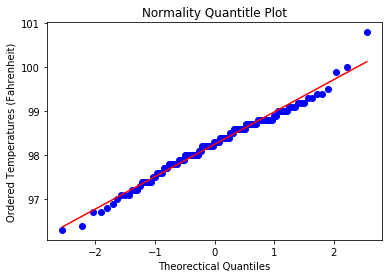

In [4]:
# Draw a normality quantile plot
import pylab

stats.probplot(df.temperature, dist='norm', plot=pylab)
plt.xlabel('Theorectical Quantiles')
plt.ylabel('Ordered Temperatures (Fahrenheit)')
plt.title('Normality Quantitle Plot')
None

## 2. Is the sample size large? Are the observations independent?

The sample size is large (n = 130), as it is greater than 30. Assuming the observations are independent, we can invoke the central limit theorem and say that the sample mean will be approximately a normal distribution. 

## 3. Is the true population mean really 98.6 degrees F?

In [5]:
# Use one-sample test with the null hypothesis that true population mean is 98.6
# Since we do not know the population standard deviation, we will use t-statistic. 

n = len(df.temperature)
se = temp_std/np.sqrt(n)

t_stat = (temp_mean - 98.6)/se
p_value = stats.t.sf(np.abs(t_stat), n-1)*2
print("The t-statistic is {:1.3f} and the p-value is {:1.7f}".format(t_stat, p_value))

The t-statistic is -5.455 and the p-value is 0.0000002


In [6]:
# Now if we use z-statistic, the result will be similar because the sample size is quite large.
# As sample size increases, t ditribution approaches the standard normal z distribution.

z_stat = (temp_mean - 98.6)/se
p_val = stats.norm.sf(np.abs(z_stat))*2
print("The z-statistic is {:1.3f} and the p-value is {:1.8f}".format(z_stat, p_val))

The z-statistic is -5.455 and the p-value is 0.00000005


Given that the p-value is less than 1%, there is evidence to reject the null hypthesis that the true population mean is 98.6 degrees F. We can conclude that the true body temperature on average is less than 98.6 degrees. 

## 4. At what temperature should we consider someone's temperature to be "abnormal"?


In [7]:
# Construct a 95% confidence interval for the sample mean
crit = stats.t.isf([0.025,0.005], n-1)
conf_int_95 = [temp_mean - crit[0]*se, temp_mean + crit[0]*se]
print("95% confidence interval: ({:2.2f}, {:2.2f})".format(conf_int_95[0],conf_int_95[1]))

95% confidence interval: (98.12, 98.38)


In [8]:
# Construct a 99% confidence interval for the sample mean
conf_int_99 = [temp_mean - crit[1]*se, temp_mean + crit[1]*se]
print("99% confidence interval: ({:2.2f}, {:2.2f})".format(conf_int_99[0],conf_int_99[1]))

99% confidence interval: (98.08, 98.42)


We can say that 95% of the time the true average temperature will fall between 98.12 and 98.38. In a wider confidence interval, there is 99% chance that the true mean temperature will be between 98.08 and 98.42. 

## 5. Is there a significant difference between males and females in normal temperature?
We can use the two-sample test of the difference in means. The null hypothesis is that the average temperature for males and females are the same. 

In [9]:
# Compute a t-statistic to test the difference in means between males and females

males = df['temperature'][df.gender=='M']
females = df['temperature'][df.gender=='F']
n_m = len(males)
n_f = len(females)
diff = males.mean() - females.mean()
std = np.sqrt(males.var()/n_m + females.var()/n_f)

t_stat_d = (diff - 0)/std
p_value_d = stats.t.sf(np.abs(t_stat_d), n_m+n_f-2)*2
print("The t-statistic is {:1.3f} and the p-value is {:1.7f}".format(t_stat_d, p_value_d))

The t-statistic is -2.285 and the p-value is 0.0239319


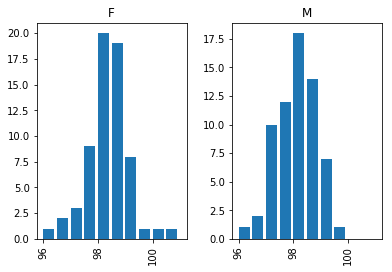

In [10]:
# Show histograms for males and females separately
df['temperature'].hist(by=df['gender'], width=0.4, range=[96, 101])
None

## Conclusion

The normal body temperature has been generally accepted as 98.6$^{\circ}$F for a long time, but the dataset here shows that the mean body temperature from a sample of 130 subjects is about 98.2$^{\circ}$F. Using the sample to test whether the true body temperature is 98.6$^{\circ}$F or not, we obtain a t-statistic of -5.455 with a p-value less than 0.001, rendering evidence to reject the widely accepted view. Moreover, the 99% confidence interval of the mean temperature ranges from 98.08 to 98.42 and is still strictly below the claim of 98.6. 

The mean temperatures for men and women are 98.1 and 98.4, which are both within the 99% confidence interval. A natural question is to ask if the difference between gender is statistically significant. A two-sample t test yields a t-statistic of -2.285 with a p-value of 0.024, providing no strong evidence for or against the claim of no difference. However, women having higher core temperatures on average might help explain why women often feel colder than men. Since women are used to high body temperatures, cold air will feel even colder to the body. But more research is needed to answer the question on the gender difference in body temperatures and explain why.